In [1]:
import pandas as pd

In [2]:
ratings = pd.read_csv(r'filtered_ratings.csv')

In [3]:
ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5.0,2000-12-31 22:12:40
1,1,661,3.0,2000-12-31 22:35:09
2,1,914,3.0,2000-12-31 22:32:48
3,1,3408,4.0,2000-12-31 22:04:35
4,1,2355,5.0,2001-01-06 23:38:11
...,...,...,...,...
997294,6040,1091,1.0,2000-04-26 02:35:41
997295,6040,1094,5.0,2000-04-25 23:21:27
997296,6040,562,5.0,2000-04-25 23:19:06
997297,6040,1096,4.0,2000-04-26 02:20:48


In [4]:
ratings.rename(columns={'Rating': 'rating'}, inplace=True)
ratings.rename(columns={'UserID': 'userId'}, inplace=True)
ratings.rename(columns={'MovieID': 'movieId'}, inplace=True)

In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997299 entries, 0 to 997298
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     997299 non-null  int64  
 1   movieId    997299 non-null  int64  
 2   rating     997299 non-null  float64
 3   Timestamp  997299 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 30.4+ MB


In [6]:
ratings['rating'] = ratings['rating'].apply(lambda x: 1 if x > 3.5 else 0)


In [7]:
ratings

,userId,movieId,rating,Timestamp
0,1,1193,1,2000-12-31 22:12:40
1,1,661,0,2000-12-31 22:35:09
2,1,914,0,2000-12-31 22:32:48
3,1,3408,1,2000-12-31 22:04:35
4,1,2355,1,2001-01-06 23:38:11
...,...,...,...,...
997294,6040,1091,0,2000-04-26 02:35:41
997295,6040,1094,1,2000-04-25 23:21:27
997296,6040,562,1,2000-04-25 23:19:06
997297,6040,1096,1,2000-04-26 02:20:48


In [8]:
value_counts = ratings['rating'].value_counts()
value_counts

rating
1    573370
0    423929
Name: count, dtype: int64

In [9]:
All_parts_objects = pd.read_csv(r'1M_YOLO_features.csv', index_col=1)
columns_to_keep = [str(i) for i in range(80)]
movies_features = All_parts_objects[columns_to_keep]
movies_features

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
movieId,,,,,,,,,,,,,,,,,,,,,
1,194,0,1,1,3,0,0,1,0,0,...,0,0,1,33,0,1,0,5,0,1
2,629,0,43,0,3,0,0,5,0,2,...,0,0,0,9,16,14,4,0,0,3
3,709,0,11,0,0,0,0,2,26,0,...,0,0,0,0,0,2,0,0,0,0
4,1141,0,23,0,0,0,0,8,0,1,...,0,0,0,0,2,0,0,0,0,0
6,1049,0,115,0,12,5,1,11,0,9,...,0,0,2,0,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,1040,0,45,0,0,0,0,0,0,0,...,0,0,6,2,2,0,0,0,0,0
3949,373,0,4,0,0,0,0,0,0,1,...,0,0,19,0,7,0,5,0,0,4
3950,1129,0,3,0,0,0,1,6,0,0,...,0,0,5,0,0,0,0,0,0,0


In [10]:
# Remove rows where all features are 0
movies_features = movies_features[(movies_features != 0).any(axis=1)]
movies_features

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
movieId,,,,,,,,,,,,,,,,,,,,,
1,194,0,1,1,3,0,0,1,0,0,...,0,0,1,33,0,1,0,5,0,1
2,629,0,43,0,3,0,0,5,0,2,...,0,0,0,9,16,14,4,0,0,3
3,709,0,11,0,0,0,0,2,26,0,...,0,0,0,0,0,2,0,0,0,0
4,1141,0,23,0,0,0,0,8,0,1,...,0,0,0,0,2,0,0,0,0,0
6,1049,0,115,0,12,5,1,11,0,9,...,0,0,2,0,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,1040,0,45,0,0,0,0,0,0,0,...,0,0,6,2,2,0,0,0,0,0
3949,373,0,4,0,0,0,0,0,0,1,...,0,0,19,0,7,0,5,0,0,4
3950,1129,0,3,0,0,0,1,6,0,0,...,0,0,5,0,0,0,0,0,0,0


In [24]:
# Assuming movies_features is your DataFrame
index_list = movies_features.index.tolist()
ratings = ratings[ratings['movieId'].isin(index_list)]
ratings.reset_index(drop=True, inplace=True)
ratings

,userId,movieId,rating,Timestamp
0,1,661,0,2000-12-31 22:35:09
1,1,914,0,2000-12-31 22:32:48
2,1,3408,1,2000-12-31 22:04:35
3,1,2355,1,2001-01-06 23:38:11
4,1,1197,0,2000-12-31 22:37:48
...,...,...,...,...
734117,6040,1090,0,2000-04-26 02:18:38
734118,6040,1091,0,2000-04-26 02:35:41
734119,6040,1094,1,2000-04-25 23:21:27
734120,6040,562,1,2000-04-25 23:19:06


In [27]:
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import classification_report

# Create training and testing sets
train_ratings, test_ratings = train_test_split(ratings, test_size=0.2, random_state=42)

# Assuming ratings DataFrame is already loaded
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')


def get_k_nearest_neighbors(item_similarity_df, movie_id, k=10):
    # Get the similarity scores for the movie with all other movies
    sim_scores = item_similarity_df[movie_id]
    # Sort the movies by similarity score in descending order and select the top k
    nearest_neighbors = sim_scores.sort_values(ascending=False).index[1:k+1]
    return nearest_neighbors

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming movies_features DataFrame is already loaded
item_metadata_matrix = movies_features

# Fill NaN with a distinct value (e.g., 0) to ensure it doesn't affect similarity
item_metadata_matrix_filled = item_metadata_matrix.fillna(0)

# Compute cosine similarity
item_similarity = cosine_similarity(item_metadata_matrix_filled)
item_similarity_df = pd.DataFrame(item_similarity, index=item_metadata_matrix.index, columns=item_metadata_matrix.index)

# Predict ratings for all users and movies in the test set using item-item similarity
y_true_all = []
y_pred_all = []

for index, row in test_ratings.iterrows():
    user_id = row['userId']
    movie_id = row['movieId']
    y_true_all.append(row['rating'])
    
    # Get k nearest neighbors based on item-item similarity
    nearest_neighbors = get_k_nearest_neighbors(item_similarity_df, movie_id, k=255)
    
    # Get the ratings of the user for the nearest neighbors
    neighbor_ratings = user_item_matrix.loc[user_id, nearest_neighbors]
    
    # If there are no ratings by nearest neighbors, predict 0
    if neighbor_ratings.isna().all():
        y_pred_all.append(0)
    else:
        # Predict the rating based on the majority vote of neighbor ratings
        y_pred_all.append(Counter(neighbor_ratings.dropna()).most_common(1)[0][0])

# Convert to integers
y_true_all = [int(val) for val in y_true_all]
y_pred_all = [int(val) for val in y_pred_all]

# Generate classification report
print(classification_report(y_true_all, y_pred_all))


              precision    recall  f1-score   support

           0       0.58      0.48      0.53     61615
           1       0.67      0.74      0.70     85210

    accuracy                           0.63    146825
   macro avg       0.62      0.61      0.61    146825
weighted avg       0.63      0.63      0.63    146825



In [29]:
# Apply thresholding to item similarity matrix
threshold = 0.3 # Adjust as needed
item_similarity_df_thresholded = item_similarity_df.applymap(lambda x: x if x > threshold else 0)

# Predict ratings for all users and movies in the test set using item-item similarity
y_true_all = []
y_pred_all = []

# Predict ratings using thresholded similarity matrix
for index, row in test_ratings.iterrows():
    user_id = row['userId']
    movie_id = row['movieId']
    y_true_all.append(row['rating'])
    # Get k nearest neighbors based on thresholded item-item similarity
    nearest_neighbors = item_similarity_df_thresholded[movie_id].nlargest(255).index
    
    # Get the ratings of the user for the nearest neighbors
    neighbor_ratings = user_item_matrix.loc[user_id, nearest_neighbors]
    
    # If there are no ratings by nearest neighbors, predict 0
    if neighbor_ratings.isna().all():
        y_pred_all.append(0)
    else:
        # Predict the rating based on the majority vote of neighbor ratings
        y_pred_all.append(Counter(neighbor_ratings.dropna()).most_common(1)[0][0])
      


# Convert to integers
y_true_all = [int(val) for val in y_true_all]
y_pred_all = [int(val) for val in y_pred_all]

# Generate classification report
print(classification_report(y_true_all, y_pred_all))

/tmp/ipykernel_406075/3271513890.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  item_similarity_df_thresholded = item_similarity_df.applymap(lambda x: x if x > threshold else 0)


              precision    recall  f1-score   support

           0       0.69      0.57      0.62     61615
           1       0.72      0.81      0.76     85210

    accuracy                           0.71    146825
   macro avg       0.70      0.69      0.69    146825
weighted avg       0.71      0.71      0.70    146825



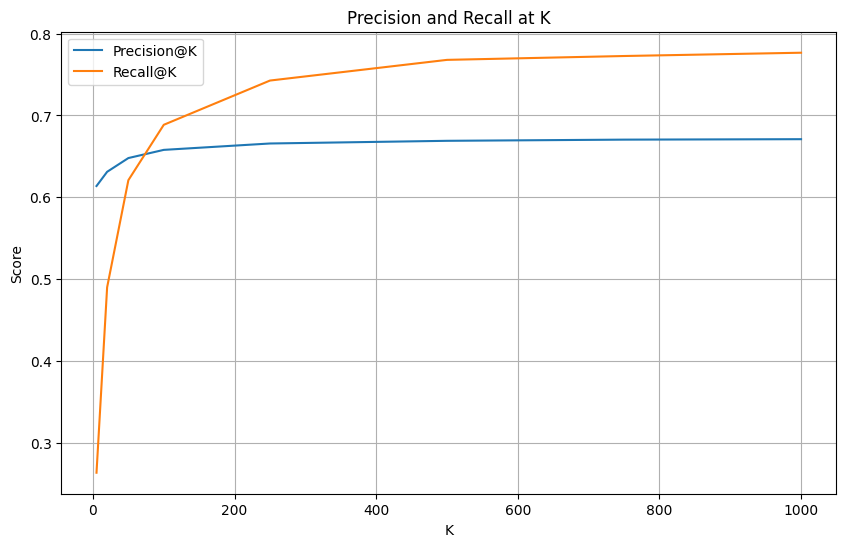

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

K_values = [5, 20, 50, 100, 250, 500, 750, 1000]
precision_scores = []
recall_scores = []

for K in K_values:
    y_true_all = []
    y_pred_all = []

    for index, row in test_ratings.iterrows():
        user_id = row['userId']
        movie_id = row['movieId']
        y_true_all.append(row['rating'])

        # Get k nearest neighbors based on item-item similarity
        nearest_neighbors = get_k_nearest_neighbors(item_similarity_df, movie_id, k=K)

        # Get the ratings of the user for the nearest neighbors
        neighbor_ratings = user_item_matrix.loc[user_id, nearest_neighbors]

        # If there are no ratings by nearest neighbors, predict 0
        if neighbor_ratings.isna().all():
            y_pred_all.append(0)
        else:
            # Predict the rating based on the majority vote of neighbor ratings
            y_pred_all.append(Counter(neighbor_ratings.dropna()).most_common(1)[0][0])

    # Convert to integers
    y_true_all = [int(val) for val in y_true_all]
    y_pred_all = [int(val) for val in y_pred_all]

    precision = precision_score(y_true_all, y_pred_all, average='binary')
    recall = recall_score(y_true_all, y_pred_all, average='binary')

    precision_scores.append(precision)
    recall_scores.append(recall)

# Plotting the precision and recall scores
plt.figure(figsize=(10, 6))
plt.plot(K_values, precision_scores, label='Precision@K')
plt.plot(K_values, recall_scores, label='Recall@K')
plt.xlabel('K')
plt.ylabel('Score')
plt.title('Precision and Recall at K')
plt.legend()
plt.grid(True)
plt.show()
